# Camera calibration

NOTE: this file is only an example to understand the process of calibration. The class used in the project is in `camera.py`



## Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

root_folder = '../'

In order to calibrate the i need to collect object points in real world and image points that are the projection into the 2D image from the camera

- Read a calibration images
- Get chessboard points on each image and save it into the image points array
- Calibrate camera

In [2]:
images = glob.glob(root_folder + 'camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

nx = 9
ny = 6

# Initialize base object point array 
base_objp = np.zeros((nx*ny, 3), np.float32)
base_objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
for img_path in images:
    # Read calibration image
    img = mpimg.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Get chessboard infos
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
    if ret == True:
        objpoints.append(np.copy(base_objp))
        imgpoints.append(corners)
    

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


### Try to undistort an image

True

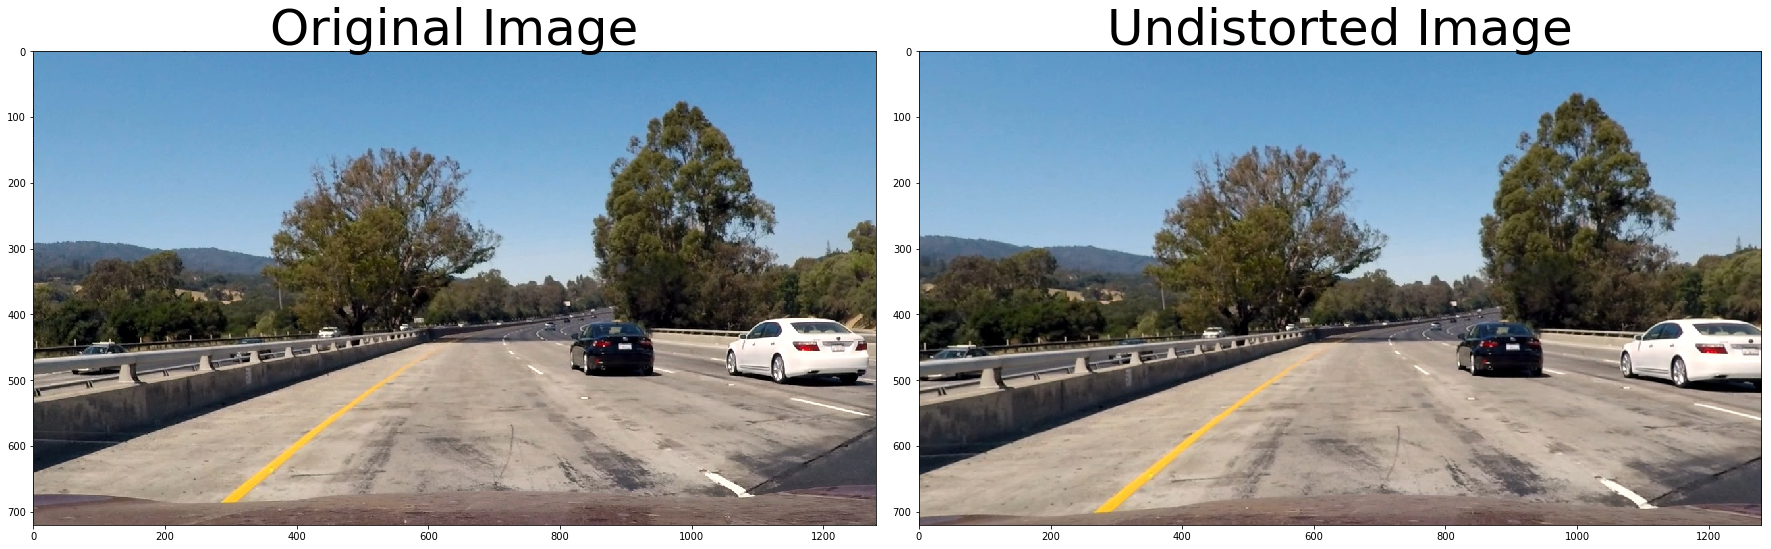

In [8]:

# Read the image
road_image = mpimg.imread(root_folder + 'examples/original.jpg')

# Undistort image
undistorted = cv2.undistort(road_image, mtx, dist, None, mtx)

# Show original and undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(road_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Try the `camera.py` functions

True

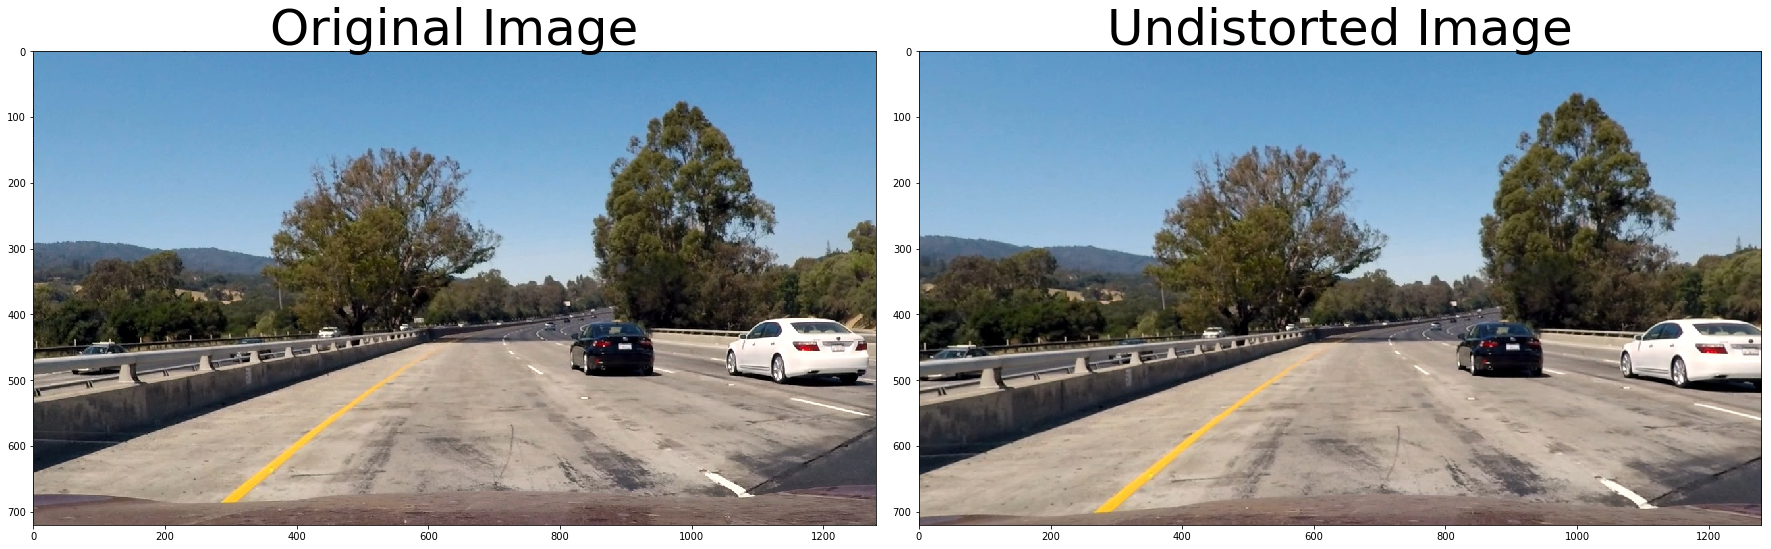

In [12]:
import sys 
sys.path.append(root_folder + 'src/')

from camera import camera

cam = camera(root_folder + 'camera_cal/calibration*.jpg')

# Call calibration function
cam.calibrate()

# Read the image
road_image = mpimg.imread(root_folder + 'examples/original.jpg')

# Undistort image
undistorted = cam.undistort(road_image)

# Show original and undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(road_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
